'''
【课程1.3】  对比分析

对比分析 → 两个互相联系的指标进行比较

绝对数比较（相减） / 相对数比较（相除）
结构分析、比例分析、空间比较分析、动态对比分析

'''

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

               A_sales     B_sales
2017-06-01  711.366118  699.867185
2017-06-02  237.537306  798.391574
2017-06-03  130.784732  801.393577
2017-06-04  383.942138   34.211390
2017-06-05  513.157164  428.911294


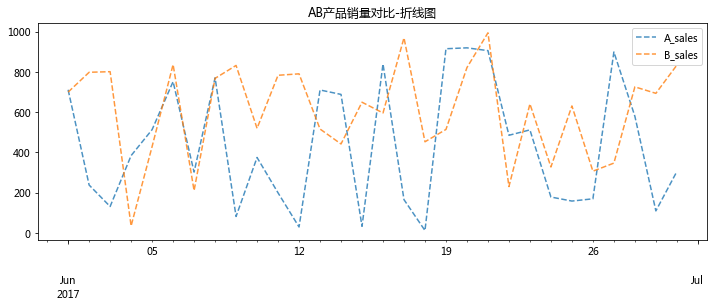

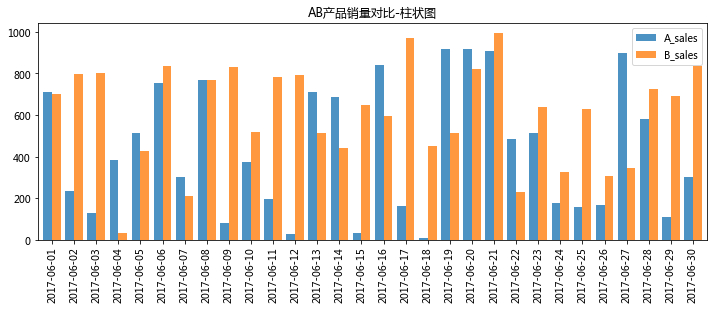

In [5]:
# 1、绝对数比较 → 相减
# 相互对比的指标在量级上不能差别过大
# （1）折线图比较
# （2）多系列柱状图比较

data = pd.DataFrame(np.random.rand(30,2)*1000,        # 创建数据 → 30天内A/B产品的日销售额
                    columns = ['A_sales','B_sales'],
                    index = pd.period_range('20170601','20170630'))
print(data.head())

data.plot(kind='line',                                # 折线图比较
          style='--',
          alpha=0.8,
          figsize=(12,4),
          title='AB产品销量对比-折线图')

data.plot(kind='bar',                                 # 多系列柱状图比较
          width=0.8,
          alpha=0.8,
          figsize=(12,4),
          title='AB产品销量对比-柱状图')

[Text(0,0,'2017-06-01'),
 Text(0,0,'2017-06-07'),
 Text(0,0,'2017-06-13'),
 Text(0,0,'2017-06-19'),
 Text(0,0,'2017-06-25')]

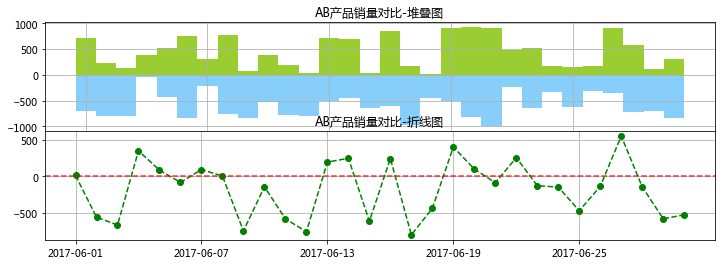

In [8]:
# 1、绝对数比较 → 相减
# （3）柱状图堆叠图+差值折线图比较

fig3 = plt.figure(figsize=(12,4))
plt.subplots_adjust(hspace=0)                     # 创建子图及间隔设置

ax1 = fig3.add_subplot(2,1,1)
x = range(len(data))
y1 = data['A_sales']
y2 = -data['B_sales']
plt.bar(x,y1,width=1,facecolor='yellowgreen')     # 创建堆叠图
plt.bar(x,y2,width=1,facecolor='lightskyblue')
plt.title('AB产品销量对比-堆叠图')
plt.grid()
plt.xticks(range(0,30,6))
ax1.set_xticklabels(data.index[::6])

ax2 = fig3.add_subplot(2,1,2)
y3 = data['A_sales'] - data['B_sales']
plt.plot(x,y3,'--go')
plt.axhline(0,hold=None,color='r',linestyle='--',alpha=0.8)
plt.grid()
plt.title('AB产品销量对比-折线图')
plt.xticks(range(0,30,6))
ax2.set_xticklabels(data.index[::6])

                A_sale      B_sale
2017-06-01   97.371005  194.733984
2017-06-02  438.553966  132.241495
2017-06-03  854.673344   53.403978
2017-06-04   99.365909  172.299736
2017-06-05  657.254324   86.501112
------
                A_sale      B_sale     A_per     B_per A_per% B_per%
2017-06-01   97.371005  194.733984  0.006436  0.063871  0.64%  6.39%
2017-06-02  438.553966  132.241495  0.028986  0.043374  2.90%  4.34%
2017-06-03  854.673344   53.403978  0.056490  0.017516  5.65%  1.75%
2017-06-04   99.365909  172.299736  0.006568  0.056513  0.66%  5.65%
2017-06-05  657.254324   86.501112  0.043442  0.028372  4.34%  2.84%


'\n 同时可以反应“强度” → 两个性质不同但有一定联系的总量指标对比，用来说明“强度”、“密度”、“普遍程度”\n 例如：国内生产总值“元/人”，人口密度“人/平方公里”\n'

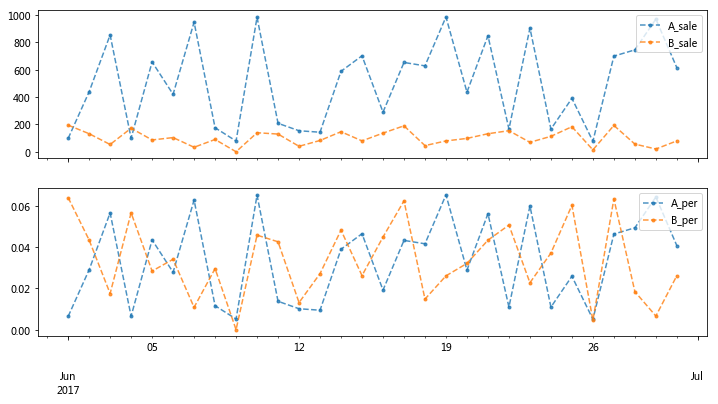

In [12]:
# 2、相对数比较 → 相除
# 有联系的指标综合计算后的对比，数值为相对数
# 结构分析、比例分析、空间比较分析、动态对比分析
# （1）结构分析
# 在分组基础上，各组总量指标与总体的总量指标对比，计算出各组数量在总量中所占比重
# 反映总体的内部结构

data = pd.DataFrame({                                 # 创建数据 → 30天内A/B产品的日销售额
    'A_sale':np.random.rand(30)*1000,                 # A/B产品销售额量级不同
    'B_sale':np.random.rand(30)*200},
     index= pd.period_range('20170601','20170630'))
print(data.head())
print('------')

data['A_per'] = data['A_sale'] / data['A_sale'].sum()  # 计算出每天的营收占比
data['B_per'] = data['B_sale'] / data['B_sale'].sum()

data['A_per%'] = data['A_per'].apply(lambda x:'%.2f%%'%(x*100))  # 转换为百分数
data['B_per%'] = data['B_per'].apply(lambda x:'%.2f%%'%(x*100))

print(data.head())

fig,axes = plt.subplots(2,1,figsize=(12,6),sharex=True)          # 绝对值对比较难看出结构性变化，通过看销售额占比来看售卖情况的对比
data[['A_sale','B_sale']].plot(kind='line',style='--.',alpha=0.8,ax=axes[0])
axes[0].legend(loc='upper right')
data[['A_per','B_per']].plot(kind='line',style='--.',alpha=0.8,ax=axes[1])
axes[1].legend(loc='upper right')

'''
 同时可以反应“强度” → 两个性质不同但有一定联系的总量指标对比，用来说明“强度”、“密度”、“普遍程度”
 例如：国内生产总值“元/人”，人口密度“人/平方公里”
'''

         comsumption       salary
2017-01  2780.874526  5316.285874
2017-02  2583.158931  5499.471286
2017-03  2292.938097  5302.230130
2017-04  2975.509684  5450.134526
2017-05  2353.401598  5415.778622
-------


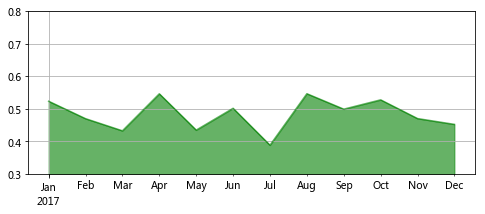

In [15]:
# 2、相对数比较 → 相除
# （2）比例分析
# 在分组的基础上，将总体不同部分的指标数值进行对比，其相对指标一般称为“比例相对数”
# 比例相对数 = 总体中某一部分数值 / 总体中另一部分数值 → “基本建设投资额中工业、农业、教育投资的比例”、“男女比例

data = pd.DataFrame({'comsumption':np.random.rand(12)*1000+2000, # 创建数据 → 某人一年内的消费、工资薪水情况
                     'salary':np.random.rand(12)*500+5000},      # 消费按照2000-3000/月随机，工资按照5000-5500/月随机
                     index=pd.period_range('2017/1','2017/12',freq='M'))
print(data.head())
print('-------')

data['c_s'] = data['comsumption'] / data['salary']               # 比例相对数 → 消费收入比

data['c_s'].plot.area(color='green',alpha=0.6,ylim=(0.3,0.8),figsize=(8,3),grid=True)


                      A            B            C           D
2017-06-01  4968.376781   695.218674  6827.915710  640.772638
2017-06-02  2451.309226  1239.169744  5895.334365  235.389015
2017-06-03  3715.500266  1109.442602  7749.346451  206.581863
2017-06-04  1087.796662   911.744337  6560.621264  529.569140
2017-06-05  2982.370014   570.074436  3170.394880  279.046707
---------


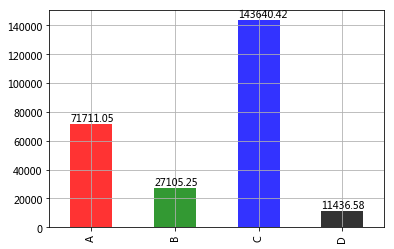

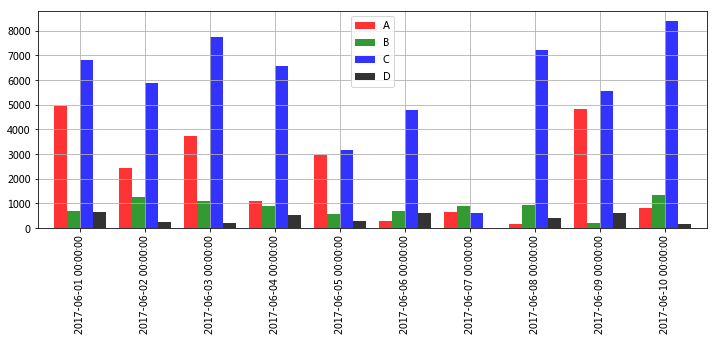

In [18]:
# 2、相对数比较 → 相除
# （3）空间比较分析（横向对比分析）
# 同类现象在同一时间不同空间的指标数值进行对比，反应同类现象在不同空间上的差异程度和现象发展不平衡的状况
# 空间比较相对数 = 甲空间某一现象的数值 / 乙空间同类现象的数值
# 一个很现实的例子 → 绝对数来看，我国多经济总量世界第一，但从人均水平来看是另一回事

data = pd.DataFrame({'A':np.random.rand(30)*5000,      # 创建数据 → 30天内A/B/C/D四个产品的销售情况
                     'B':np.random.rand(30)*2000,      # 不同产品的销售量级不同
                     'C':np.random.rand(30)*10000,
                     'D':np.random.rand(30)*800},
                    index = pd.date_range('20170601','20170630'))
print(data.head())
print('---------')

data.sum().plot(kind='bar',color=['r','g','b','k'],alpha=0.8,grid=True) # 通过柱状图做横向比较 → 4个产品的销售额总量
for i,j in zip(range(4),data.sum()):
    plt.text(i-0.25,j+2000,'%.2f'%j,color='k')
    
# 多系列柱状图，横向比较前十天4个产品的销售额
data[:10].plot(kind='bar',color=['r','g','b','k'],alpha=0.8,grid=True,figsize=(12,4),width=0.8)

'''
 关于同比与环比
 同比 → 产品A在2015.3和2016.3的比较（相邻时间段的同一时间点）
 环比 → 产品A在2015.3和2015.4的比较（相邻时间段的比较）
 如何界定“相邻时间段”与“时间点”，决定了是同比还是环比
 
'''

                      A
2017-06-01  2141.181600
2017-06-02  1293.786968
2017-06-03  1367.527343
2017-06-04  1150.027924
2017-06-05  2297.071910
---------


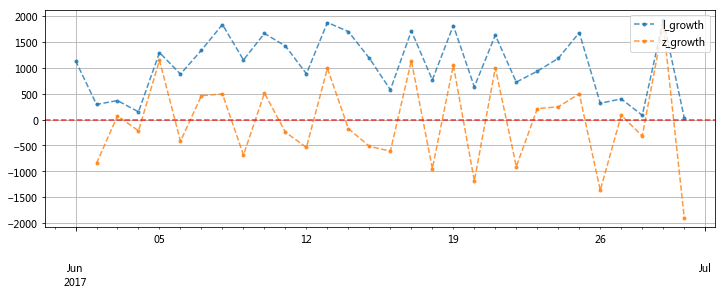

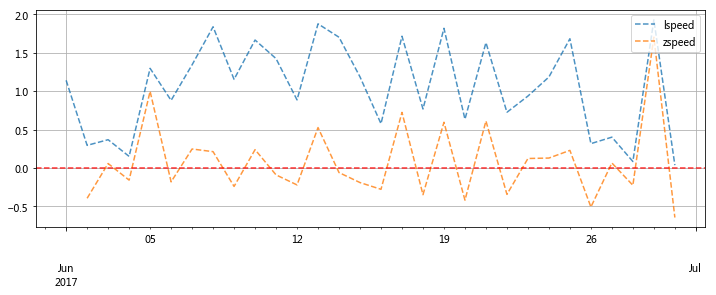

In [22]:
# 2、相对数比较 → 相除
# （4）动态对比分析（纵向对比分析）
# 同一现象在不同时间上的指标数值进行对比，反应现象的数量随着时间推移而发展变动的程度及趋势
# 最基本方法，计算动态相对数 → 发展速度
# 动态相对数（发展速度） = 某一现象的报告期数值 / 同一现象的基期数值
# 基期：用来比较的基础时期
# 报告期：所要研究的时期，又称计算期

data = pd.DataFrame({'A':np.random.rand(30)*2000+1000},       # 创建数据 → 30天内A产品的销售情况
                    index=pd.date_range('20170601','20170630'))
print(data.head())
print('---------')
data['base'] = 1000                               # 假设基准销售额为1000，后面每一天都为计算期
data['l_growth'] = data['A'] - data['base']       # 累计增长量 = 报告期水平 - 固定基期水平
data['z_growth'] = data['A'] - data.shift(1)['A'] # 逐期增长量 = 报告期水平 - 报告期前一期水平

data[['l_growth','z_growth']].plot(figsize=(12,4),style='--.',alpha=0.8)  # 通过折线图查看增长量情况
plt.axhline(0,hold=None,color='r',linestyle='--',alpha=0.8)
plt.legend(loc='upper right')
plt.grid()

data['lspeed'] = data['l_growth'] / 1000                # 定基增长速度
data['zspeed'] = data['z_growth'] / data.shift(1)['A']  # 环比增长速度
data[['lspeed','zspeed']].plot(figsize=(12,4),style='--',alpha=0.8)       # 通过折线图查看发展速度
plt.axhline(0,hold=None,color='r',linestyle='--',alpha=0.8)
plt.legend(loc='upper right')
plt.grid()